# Reseach Topic: Predict Wage with Machline Methods
## What am I doing ?
For now, we predict salary with several models.

## Data
The source of data is NLSY97. The portal can be accessed from [here](https://www.nlsinfo.org/investigator/pages/search.jsp?s=NLSY97). The data set is pre-cleaned by STATA with around 4500 obervations each year from 2. Features include age, year of experience, gender, schooling, race, marital status, industry, region(not yet!!). 

## Run Some Models
Bofore running anything, we split the data into training set, validation set, test set. <br/> I am preparing to do the following models:
- Linear model (mincer equations)
- Trees and Forests
- Neural Nets

The performences of models will be compared in accuracy and R-square

## Further Thoughts
(Haven't done yet) We resample the data into previous years and the following years. Then we train the model on previous years data and test it on the data from the following years.

In [1]:
import warnings
warnings.filterwarnings("ignore") # turn off warnings a bit

# Let's get started :D

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

'''Preprocessing Steps
'''
data_path = './data/mincer.xlsx'
#dat.describe(include="all")
dat = pd.read_excel(data_path)
dat = dat.fillna(0)


In [8]:
dat_tmp = dat[dat['year']==2006]
train, test =  train_test_split(dat_tmp, test_size = 0.25, random_state = 12)
y_train, X_train, y_test, X_test = train['lnwage'], train.iloc[:,4:], test['lnwage'], test.iloc[:,4:]

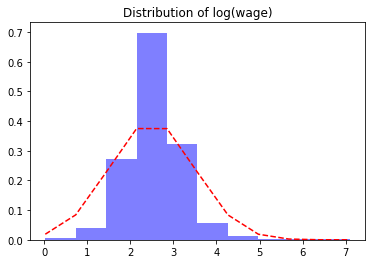

In [167]:
import matplotlib.mlab as mlab
mu = 2.5
sigma = 1 # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)

n, bins, patches = plt.hist(dat['lnwage'],normed=1, facecolor='blue', alpha=0.5)

y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.title(r'Distribution of log(wage)')
plt.show()

## Define Models here

In [11]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.optimizers import adam


def mincer(X_train, y_train,  X_test, y_test):
    regressor = LinearRegression()
    reg = regressor.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    # return reg.score(X_test, y_test)
#     return np.mean(np.square(y_pred-y_test))
    return metrics.r2_score(y_test,y_pred)

def trees(X_train, y_train, X_test, y_test, model="rf", n_estimators=5, max_depth=5):
    if  model == "gb":
        regressor = GradientBoostingRegressor(max_depth=15)
    else:
        regressor = RandomForestRegressor(n_estimators=5, max_depth=1, random_state=1)
    reg = regressor.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    r2 = reg.score(X_test, y_test)

#     return metrics.r2_score(y_test,y_pred)
    return r2


def nn(X_train, y_train, X_test, y_test):
    dim =  X_train.shape[1]
    model = Sequential()
    model.add(Dense(8, input_dim=dim, activation='sigmoid'))
    model.add(Dense(4, activation='sigmoid'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation="linear"))
    
    opt = adam(lr=1e-3, decay=1e-3 / 200)
    model.compile(loss="mean_absolute_percentage_error", optimizer=opt)
    model.fit(X_train, y_train, validation_data=(  X_test, y_test), epochs=50, batch_size=30)
    
    y_pred = model.predict(X_test).flatten()
    r2 = np.mean(np.square((y_pred-np.mean(y_test)))) /np.var(y_test)
    print("The r^2 of this iteration is: {:.2f}".format(r2))
    
    return r2

Using TensorFlow backend.


# Model 1: Linear Model (Mincer Equation)
It is a panel data regression using random effect model.

In [12]:
r2 = mincer(X_train, y_train,  X_test, y_test)
print(r2)

0.20913361516628504


# Model 2: Random Forest

In [13]:
trees(X_train, y_train, X_test, y_test, n_estimators=50, max_depth=5)

0.14328245028832787

# Model 3: Neural Nets
Use the most basic model, multilayer perceptron (MLP)

# Test 1: Performance Over the Years
Now I am running the models over the years (2005 to 2011, 2013, 2015). 

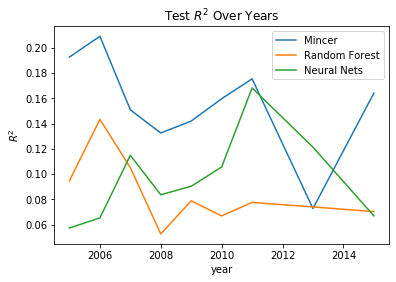

In [16]:
import matplotlib.pyplot as plt

plt.plot(years, res['ols'], label = "Mincer")
plt.plot(years, res['trees'], label = "Random Forest")
plt.plot(years, res['nets'], label = "Neural Nets")
plt.ylabel(r'$R^2$')
plt.xlabel('year')
plt.title(r'Test $R^2$ Over Years')
plt.legend()
plt.show()